# Barron dispersion function analysis


In [1]:
## External modules.
from matplotlib import cm
from matplotlib.colors import BoundaryNorm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator, StrMethodFormatter
import numpy as np
from os import path
from scipy.optimize import minimize_scalar

## Internal modules.
from mml.utils import makedir_safe
import setup_dispersions as disp
from setup_results import img_dir, my_fontsize, my_ext, export_legend

In [2]:
## Create directory to save figures.
makedir_safe(img_dir)

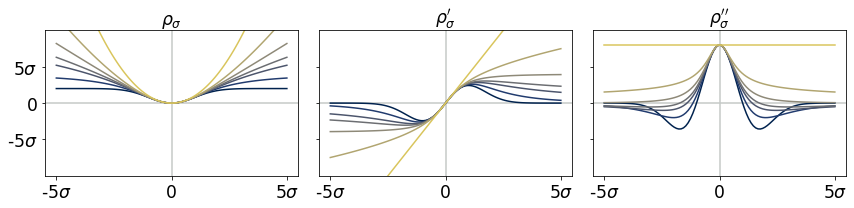

In [3]:
## Visualization of the underlying deviation function.

alpha_list = [np.NINF, -2.0, 0.0, 0.5, 1.0, 1.5, 2.0]
alpha_names = [str(a) for a in alpha_list]
alpha_names[0] = r"-$\infty$" # for a well-formatted NINF.
sigma = 0.5
width_factor = 5
factor_list = [-width_factor, 0, width_factor]

## Tick setup.
ticks = [ sigma*factor for factor in factor_list ]
tick_labels = [str(factor_list[0])+r"$\sigma$",
               str(0), 
               str(factor_list[-1])+r"$\sigma$"]

## Colour setup.
alpha_cmap = cm.get_cmap("cividis")
alpha_colours = []
for i in range(len(alpha_list)):
    alpha_colours += [alpha_cmap(i/len(alpha_list))]

## Computation and plotting.

fig, (ax_fn, ax_d1, ax_d2) = plt.subplots(1, 3, figsize=(12,3), sharey=True)

### Graph of dispersion function itself.
x_values = np.linspace(-width_factor*sigma, width_factor*sigma, 100)
ax_fn.axhline(y=0.0, color="xkcd:silver")
ax_fn.axvline(x=0.0, color="xkcd:silver")
for i, alpha in enumerate(alpha_list):
    y_values = disp.dispersion_barron(x=x_values/sigma, alpha=alpha)
    ax_fn.plot(x_values, y_values, color=alpha_colours[i], label=alpha_names[i], ls="-")
ax_fn.set_xticks(ticks)
ax_fn.set_xticklabels(tick_labels)
ax_fn.set_yticks(ticks)
ax_fn.set_yticklabels(tick_labels)
ax_fn.tick_params(labelsize=my_fontsize)
ax_fn.set_ylim(bottom=-2*width_factor*sigma, top=2*width_factor*sigma)
ax_fn.set_title(r"$\rho_{\sigma}$", size=my_fontsize)

### Graph of first derivative of dispersion function.
x_values = np.linspace(-width_factor*sigma, width_factor*sigma, 100)
ax_d1.axhline(y=0.0, color="xkcd:silver")
ax_d1.axvline(x=0.0, color="xkcd:silver")
for i, alpha in enumerate(alpha_list):
    y_values = disp.d1_barron(x=x_values/sigma, alpha=alpha) / sigma # note the correction for chain rule.
    ax_d1.plot(x_values, y_values, color=alpha_colours[i], label=alpha_names[i], ls="-")
ax_d1.set_xticks(ticks)
ax_d1.set_xticklabels(tick_labels)
ax_d1.tick_params(labelsize=my_fontsize)
ax_d1.set_title(r"$\rho_{\sigma}^{\prime}$", size=my_fontsize)

### Graph of second derivative of dispersion function.
x_values = np.linspace(-width_factor*sigma, width_factor*sigma, 100)
ax_d2.axhline(y=0.0, color="xkcd:silver")
ax_d2.axvline(x=0.0, color="xkcd:silver")
for i, alpha in enumerate(alpha_list):
    y_values = disp.d2_barron(x=x_values/sigma, alpha=alpha) / sigma**2 # note the correction for chain rule.
    ax_d2.plot(x_values, y_values, color=alpha_colours[i], label=alpha_names[i], ls="-")
ax_d2.set_xticks(ticks)
ax_d2.set_xticklabels(tick_labels)
ax_d2.tick_params(labelsize=my_fontsize)
ax_d2.set_title(r"$\rho_{\sigma}^{\prime\prime}$", size=my_fontsize)

plt.tight_layout()
fname = path.join(img_dir, "barron_disp.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

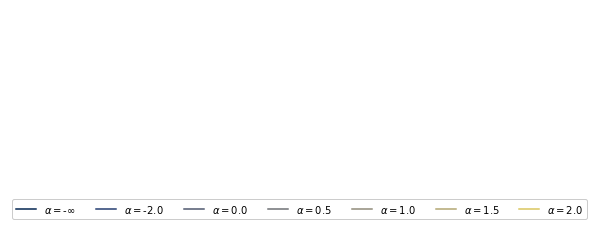

In [4]:
## A standalone legend for visual ease.

labels = []
colours = []
linestyles = []
for i, alpha in enumerate(alpha_names):
    labels += [ r"$\alpha =$"+alpha ]
    colours += [ alpha_colours[i] ]
    linestyles += [ "-" ]
    
legend_fn = lambda m,c,l: plt.plot([],[],marker=m, color=c, ls=l)[0]
handles = [legend_fn(None, colours[i], linestyles[i]) for i in range(len(labels))]
legend = plt.legend(handles, labels, loc=3, ncol=7, framealpha=1, frameon=True)
fname = path.join(img_dir, "barron_legend.{}".format(my_ext))
export_legend(legend=legend, filename=fname)
plt.show()


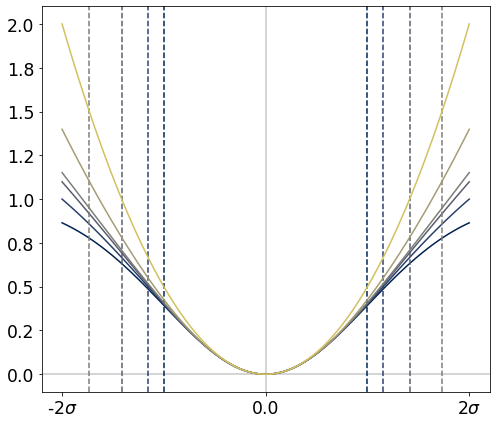

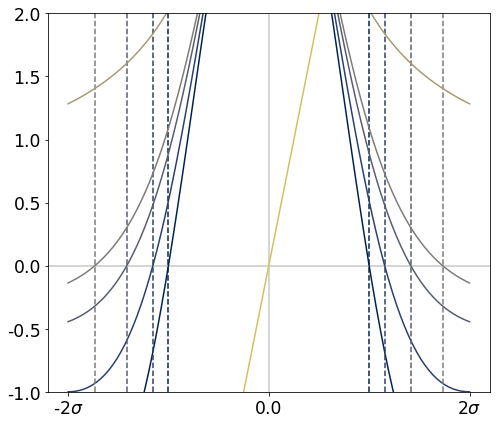

In [5]:
## We also provide a zoomed-in example highlighting that the inflection points are where we expect.

def inflection_points(sigma, alpha):
    
    if alpha >= 1.0:
        raise ValueError("No inflection points for alpha >= 1.0.")
    elif alpha == 0.0:
        ip = np.sqrt(2)*sigma
    elif alpha == np.NINF:
        ip = sigma
    else:
        ip = np.sqrt(np.absolute(alpha-2)/(1.0-alpha))*sigma
    
    return [-ip,ip]


alpha_list = [np.NINF, -2.0, 0.0, 0.5, 1.5, 2.0]
alpha_names = [str(a) for a in alpha_list]
alpha_names[0] = r"-$\infty$" # for a well-formatted NINF.
sigma = 0.5
width_factor = 2
factor_list = [-width_factor, 0, width_factor]
np.arange(-width_factor, width_factor+1.0, 1.0)

## Colour setup.
alpha_cmap = cm.get_cmap("cividis")
alpha_colours = []
for i in range(len(alpha_list)):
    alpha_colours += [alpha_cmap(i/len(alpha_list))]


## Dispersion fn.
fig, ax = plt.subplots(1, 1, figsize=(7,6))
x_values = np.linspace(-width_factor*sigma, width_factor*sigma, 100)
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")
for i, alpha in enumerate(alpha_list):
    y_values = disp.dispersion_barron(x=x_values/sigma, alpha=alpha)
    ax.plot(x_values, y_values, color=alpha_colours[i], label=alpha_names[i], ls="-")
    
    if alpha < 1.0:
        ax.axvline(x=inflection_points(sigma=sigma, alpha=alpha)[0], color=alpha_colours[i], ls="dashed")
        ax.axvline(x=inflection_points(sigma=sigma, alpha=alpha)[1], color=alpha_colours[i], ls="dashed")
    
ticks = [ sigma*factor for factor in factor_list ]
tick_labels = [str(factor_list[0])+r"$\sigma$",
               str(0.0), 
               str(factor_list[-1])+r"$\sigma$"]
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:2.1f}"))
ax.tick_params(labelsize=my_fontsize)
#ax.set_ylim(bottom=-0.25, top=width_factor*sigma/4)
plt.tight_layout()
fname = path.join(img_dir, "dispersion_barron_inflection.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()


## Dispersion fn. (second deriv)
fig, ax = plt.subplots(1, 1, figsize=(7,6))
x_values = np.linspace(-width_factor*sigma, width_factor*sigma, 100)
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")
for i, alpha in enumerate(alpha_list):
    y_values = disp.d2_barron(x=x_values/sigma, alpha=alpha) / sigma**2 # note the correction for chain rule.
    ax.plot(x_values, y_values, color=alpha_colours[i], label=alpha_names[i], ls="-")
    
    if alpha < 1.0:
        ax.axvline(x=inflection_points(sigma=sigma, alpha=alpha)[0], color=alpha_colours[i], ls="dashed")
        ax.axvline(x=inflection_points(sigma=sigma, alpha=alpha)[1], color=alpha_colours[i], ls="dashed")
    
ticks = [ sigma*factor for factor in factor_list ]
tick_labels = [str(factor_list[0])+r"$\sigma$",
               str(0.0), 
               str(factor_list[-1])+r"$\sigma$"]
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:2.1f}"))
ax.tick_params(labelsize=my_fontsize)
ax.set_ylim(bottom=-width_factor*sigma, top=2*width_factor*sigma)
plt.tight_layout()
fname = path.join(img_dir, "d2_barron_inflection.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

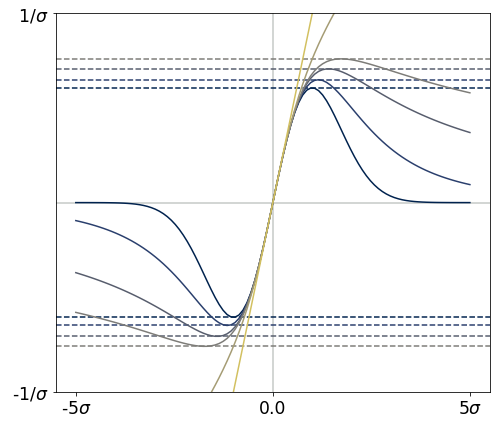

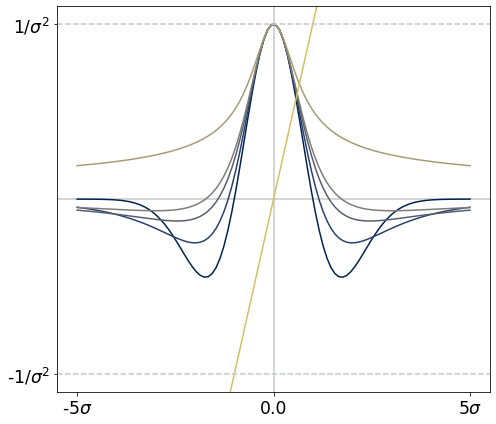

In [6]:
## A zoomed-in example highlighting the Lipschitz coefficients.

def barron_lipschitz(sigma, alpha):
    '''
    Lipschitz coefficients for the Barron class.
    '''
    if alpha > 1.0:
        return np.inf
    elif alpha == 1.0:
        return 1.0/sigma
    elif alpha == 0.0:
        return 1.0/(np.sqrt(2.0)*sigma)
    elif alpha == np.NINF:
        return np.exp(-0.5)/sigma
    else:
        adiff = np.absolute(alpha-2.0)
        aone = 1.0-alpha
        return np.sqrt(aone/adiff)**aone / sigma


def barron_smooth(sigma, alpha):
    '''
    Smoothness coefficients for the Barron class.
    '''
    return 1.0/sigma**2


alpha_list = [np.NINF, -2.0, 0.0, 0.5, 1.5, 2.0]
alpha_names = [str(a) for a in alpha_list]
alpha_names[0] = r"-$\infty$" # for a well-formatted NINF.
sigma = 0.5
width_factor = 5
factor_list = [-width_factor, 0, width_factor]
np.arange(-width_factor, width_factor+1.0, 1.0)

## Colour setup.
alpha_cmap = cm.get_cmap("cividis")
alpha_colours = []
for i in range(len(alpha_list)):
    alpha_colours += [alpha_cmap(i/len(alpha_list))]


## Dispersion fn. (first deriv)
fig, ax = plt.subplots(1, 1, figsize=(7,6))
x_values = np.linspace(-width_factor*sigma, width_factor*sigma, 100)
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")
lipschitz_coefs = []
for i, alpha in enumerate(alpha_list):
    y_values = disp.d1_barron(x=x_values/sigma, alpha=alpha)/sigma # note the correction for chain rule.
    ax.plot(x_values, y_values, color=alpha_colours[i], label=alpha_names[i], ls="-")
    lipschitz_coef = barron_lipschitz(sigma=sigma, alpha=alpha)
    lipschitz_coefs += [lipschitz_coef]
    ax.axhline(y=lipschitz_coef, color=alpha_colours[i], ls="dashed")
    ax.axhline(y=-lipschitz_coef, color=alpha_colours[i], ls="dashed")
    
xticks = [ sigma*factor for factor in factor_list ]
xtick_labels = [str(factor_list[0])+r"$\sigma$",
               str(0.0), 
               str(factor_list[-1])+r"$\sigma$"]
yticks = [-1.0/sigma, 1.0/sigma]
ytick_labels = [r" -$1/\sigma$", r"  $1/\sigma$"]
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)
#ax.yaxis.set_major_formatter(StrMethodFormatter("{x:2.1f}"))
ax.tick_params(labelsize=my_fontsize)
ax.set_ylim(bottom=-1.0/sigma, top=1.0/sigma)
plt.tight_layout()
fname = path.join(img_dir, "d1_barron_bounds.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()


## Dispersion fn. (second deriv)
fig, ax = plt.subplots(1, 1, figsize=(7,6))
x_values = np.linspace(-width_factor*sigma, width_factor*sigma, 100)
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")
for i, alpha in enumerate(alpha_list):
    y_values = disp.d2_barron(x=x_values/sigma, alpha=alpha)/sigma**2 # note the correction for chain rule.
    ax.plot(x_values, y_values, color=alpha_colours[i], label=alpha_names[i], ls="-")

smoothness_coef = barron_smooth(sigma=sigma, alpha=alpha)
ax.axhline(y=smoothness_coef, color="xkcd:silver", ls="dashed")
ax.axhline(y=-smoothness_coef, color="xkcd:silver", ls="dashed")
    
xticks = [ sigma*factor for factor in factor_list ]
xtick_labels = [str(factor_list[0])+r"$\sigma$",
               str(0.0), 
               str(factor_list[-1])+r"$\sigma$"]
yticks = [-smoothness_coef, smoothness_coef]
ytick_labels = [r"-$1/\sigma^{2}$", r"$1/\sigma^{2}$"]
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)
#ax.yaxis.set_major_formatter(StrMethodFormatter("{x:2.1f}"))
ax.tick_params(labelsize=my_fontsize)
ax.set_ylim(bottom=-smoothness_coef*1.1, top=smoothness_coef*1.1)
plt.tight_layout()
fname = path.join(img_dir, "d2_barron_bounds.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

___